<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module2_GammaAndPoissonRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-lego #so it appears the skikit learn in Colab doesn't have GLMs in it. This should fiox

     |████████████████████████████████| 222 kB 6.4 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 23.1 MB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 72.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=f22d51be46138c4e7eb148dbc7abdb66a55334e6e1c4065a7b43418e6bb0c3ff
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=f6f226edfb39625eb2288a5b58190e580e8ab7f0914557211bf9d663570477d6
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor

In [2]:
#!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 50 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [2]:
dat_frq1 = pd.read_csv('ML_656/freMTPLfreq1.csv')
dat_frq2 = pd.read_csv('ML_656/freMTPLfreq2.csv')
dat_frq = pd.concat([dat_frq1,dat_frq2])
dat_frq.head() 

,Unnamed: 0,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density
0,1,1,0,0.09,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
1,2,2,0,0.84,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
2,3,3,0,0.52,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
3,4,4,0,0.45,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
4,5,5,0,0.15,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60


In [3]:
dat_frq.describe()

,Unnamed: 0,PolicyID,ClaimNb,Exposure,CarAge,DriverAge,Density
count,413169.000000,413169.000000,413169.000000,413169.000000,413169.000000,413169.000000,413169.000000
mean,206585.000000,206585.000000,0.039163,0.561088,7.532404,45.319876,1985.153913
std,119271.761023,119271.761023,0.204053,0.369477,5.763011,14.328120,4776.254543
min,1.000000,1.000000,0.000000,0.002732,0.000000,18.000000,2.000000
25%,103293.000000,103293.000000,0.000000,0.200000,3.000000,34.000000,67.000000
50%,206585.000000,206585.000000,0.000000,0.540000,7.000000,44.000000,287.000000
75%,309877.000000,309877.000000,0.000000,1.000000,12.000000,54.000000,1410.000000
max,413169.000000,413169.000000,4.000000,1.990000,100.000000,99.000000,27000.000000


In [4]:
pd.crosstab(index=dat_frq['ClaimNb'], columns="count")

col_0,count
ClaimNb,
0,397779
1,14633
2,726
3,28
4,3


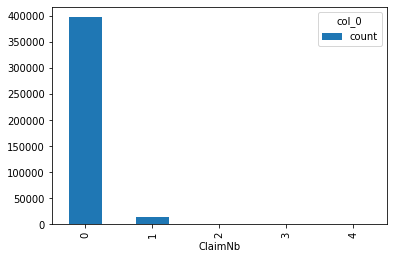

In [5]:
pd.crosstab(index=dat_frq['ClaimNb'], columns="count").plot(kind='bar')

In [6]:
dat_sev = pd.read_csv('ML_656/freMTPLsev.csv')
print(dat_sev.shape)
dat_sev.head() 

(16181, 3)


,Unnamed: 0,PolicyID,ClaimAmount
0,1,63987,1172
1,2,310037,1905
2,3,314463,1150
3,4,318713,1220
4,5,309380,55077


In [7]:
dat_sev.describe()

,Unnamed: 0,PolicyID,ClaimAmount
count,16181.000000,16181.000000,1.618100e+04
mean,8091.000000,185015.202151,2.129972e+03
std,4671.196688,117946.980398,2.106364e+04
min,1.000000,33.000000,2.000000e+00
25%,4046.000000,83922.000000,6.980000e+02
50%,8091.000000,169907.000000,1.156000e+03
75%,12136.000000,281599.000000,1.243000e+03
max,16181.000000,412944.000000,2.036833e+06


In [8]:
df = dat_sev.groupby('PolicyID', as_index=False).agg({"ClaimAmount":"mean"})
df

,PolicyID,ClaimAmount
0,33,302.0
1,41,2001.0
2,92,1449.0
3,96,5435.0
4,142,1390.0
...,...,...
15385,412262,1426.0
15386,412270,1364.0
15387,412664,7603.0
15388,412926,1751.0


In [9]:
dat = pd.merge(dat_frq, dat_sev.groupby('PolicyID', as_index=False).agg({"ClaimAmount":"mean"}),how='left')
dat = dat.fillna(0)
dat.head()

,Unnamed: 0,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimAmount
0,1,1,0,0.09,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,0.0
1,2,2,0,0.84,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,0.0
2,3,3,0,0.52,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,0.0
3,4,4,0,0.45,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,0.0
4,5,5,0,0.15,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60,0.0


In [10]:
dummies = pd.get_dummies(dat[dat.columns[[4,7,8,9]]])
dat = dat.drop(dat.columns[[0, 1, 4, 7, 8, 9]], axis=1)
dat = pd.concat([dat,dummies], axis=1)
dat.head()

,ClaimNb,Exposure,CarAge,DriverAge,Density,ClaimAmount,Power_d,Power_e,Power_f,Power_g,Power_h,Power_i,Power_j,Power_k,Power_l,Power_m,Power_n,Power_o,Brand_Fiat,Brand_Japanese (except Nissan) or Korean,"Brand_Mercedes, Chrysler or BMW","Brand_Opel, General Motors or Ford","Brand_Renault, Nissan or Citroen","Brand_Volkswagen, Audi, Skoda or Seat",Brand_other,Gas_Diesel,Gas_Regular,Region_Aquitaine,Region_Basse-Normandie,Region_Bretagne,Region_Centre,Region_Haute-Normandie,Region_Ile-de-France,Region_Limousin,Region_Nord-Pas-de-Calais,Region_Pays-de-la-Loire,Region_Poitou-Charentes
0,0,0.09,0,46,76,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,0.84,0,46,76,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.52,2,38,3003,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0.45,2,38,3003,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0.15,0,41,60,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


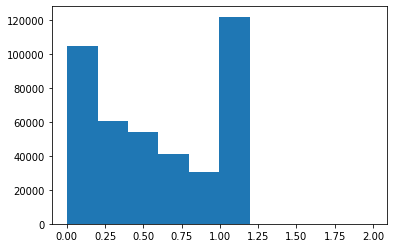

In [11]:
plt.hist(dat['Exposure'])
plt.show()

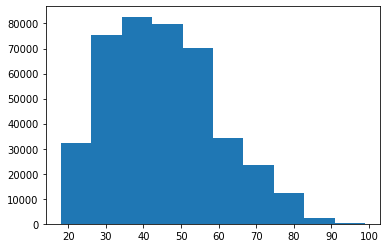

In [12]:
plt.hist(dat['DriverAge'])
plt.show()

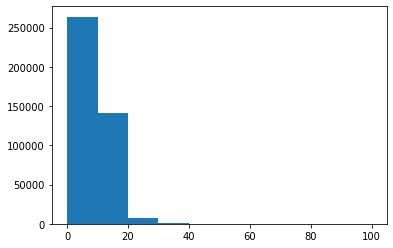

In [13]:
plt.hist(dat['CarAge'])
plt.show()

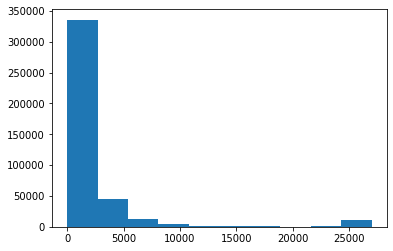

In [14]:
plt.hist(dat['Density'])
plt.show()

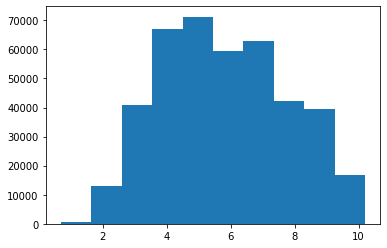

In [15]:
dat.loc[:, 'Density'] = np.log(dat['Density'])
plt.hist(dat['Density'])
plt.show()

In [16]:
dat.loc[dat['ClaimAmount']>0,'ClaimAmount'].quantile([.9, .95, .99, .999])

0.900      2583.100
0.950      4269.100
0.990     16103.355
0.999    131058.421
Name: ClaimAmount, dtype: float64

In [17]:
dat['ClaimAmount'][dat['ClaimAmount']>50000] = 50000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
Train, Test = train_test_split(dat, test_size=0.25)
Train_y_freq = Train['ClaimNb']
Train_y_sev = Train['ClaimAmount']
Train_X = Train.drop(columns = ['ClaimNb','ClaimAmount'])
Test_y_freq = Test['ClaimNb']
Test_y_sev = Test['ClaimAmount']
Test_X = Test.drop(columns = ['ClaimNb','ClaimAmount'])


In [19]:
freqmodel = PoissonRegressor()
freqmodel.fit(Train_X,Train_y_freq)
preds_Train = freqmodel.predict(Train_X)
np.corrcoef(preds_Train,Train_y_freq)

array([[1.        , 0.01764376],
       [0.01764376, 1.        ]])

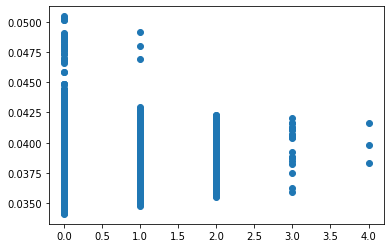

In [20]:
plt.scatter(Train_y_freq,preds_Train)

In [21]:
preds_Test = freqmodel.predict(Test_X)
np.corrcoef(preds_Test,Test_y_freq)

array([[1.        , 0.01671338],
       [0.01671338, 1.        ]])

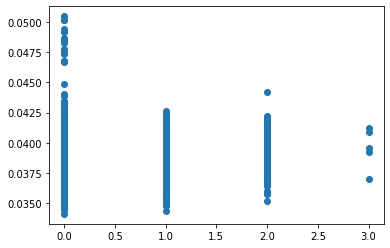

In [22]:
plt.scatter(Test_y_freq,preds_Test)

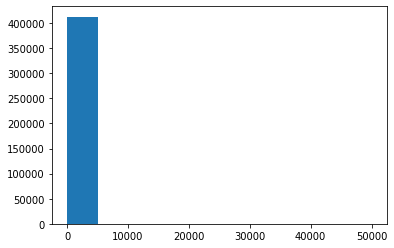

In [23]:
plt.hist(dat['ClaimAmount'])
plt.show()

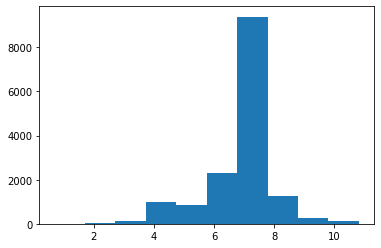

In [24]:
plt.hist(np.log(dat.loc[dat['ClaimAmount']>0,'ClaimAmount']))
plt.show()

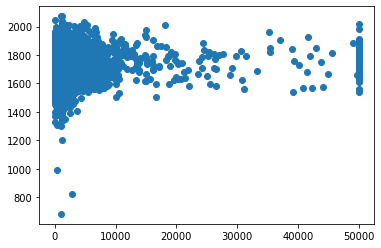

In [25]:
Train = Train.loc[Train['ClaimAmount']>0,:]
Train_y_sev = Train['ClaimAmount']
Train_X = Train.drop(columns = ['ClaimNb','ClaimAmount'])
sevmodel = GammaRegressor()
sevmodel.fit(Train_X,Train_y_sev)
plt.scatter(Train_y_sev,sevmodel.predict(Train_X))

In [26]:
preds_Test_sev = sevmodel.predict(Test_X)
preds_Test_tot = preds_Test * preds_Test_sev

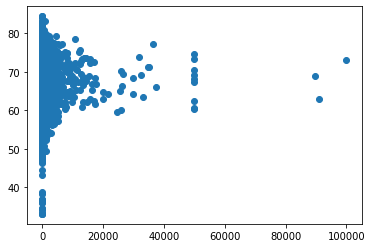

In [27]:
plt.scatter(Test_y_freq * Test_y_sev,preds_Test_tot)

In [28]:
np.corrcoef(Test_y_freq * Test_y_sev,preds_Test_tot)

array([[ 1.        , -0.00363396],
       [-0.00363396,  1.        ]])